In [12]:
using LinearAlgebra, Statistics, Random, Plots, GLPK, Convex

In [5]:
Random.seed!(1)
m = 400
n = 200
A = randn(m,n)
b = randn(m);

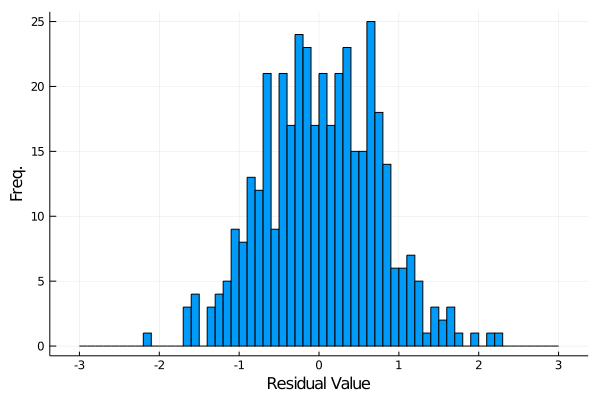

In [11]:
## least squares solution
x_ls = A\b;
res_ls = A*x_ls-b;

histogram(res_ls,bins=-3:.1:3,xlabel = "Residual Value", ylabel = "Freq.", legend = false)

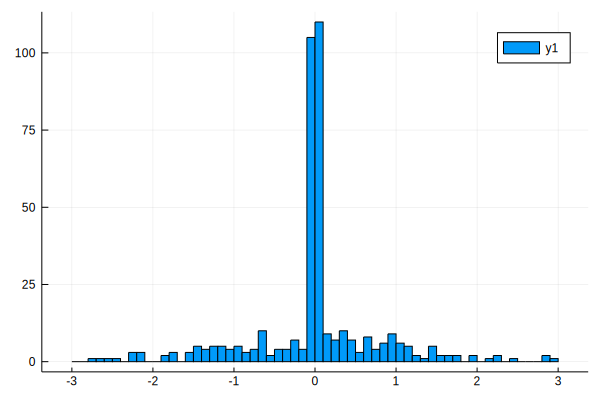

In [35]:
## sparse residual 
x = Variable(n+m);
c = [zeros(n);ones(m)];
Alin = [A -I(m); -A -I(m)];
blin = [b;-b];

problem = minimize(c'*x, [Alin*x <= blin])

solve!(problem, GLPK.Optimizer)

res_l1 = A*x.value[1:n]-b
histogram(res_l1,bins=-3:.1:3)

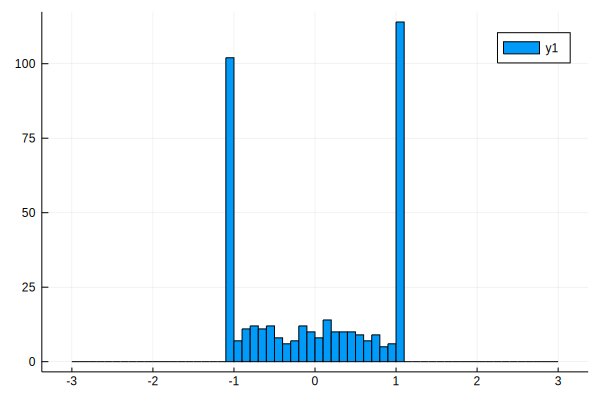

In [33]:
## robust residual 
x = Variable(n+1);
c = [zeros(n);1];
Alin = [A -ones(m,1); -A -ones(m,1)];
blin = [b;-b];

problem = minimize(c'*x, [Alin*x <= blin])

solve!(problem, GLPK.Optimizer)
res_linf = A*x.value[1:n]-b;
histogram(res_linf,bins=-3:.1:3)